In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob
import gouda
import gzip
import numpy as np
import os
import torch
import tqdm.auto as tqdm
import sys
        
from src.utils import reload_model, prep_image
from src.interpret import GradCAM, GradCAMPlus, ScoreCAM, KernelWeighted
from src.constants import POST_BOTTLENECK_LAYERS

In [3]:
layers = [
    'decoder1.dec1conv2',
    'decoder1.dec1conv1',
    'upconv1',
    'decoder2.dec2conv2',
    'decoder2.dec2conv1',
    'upconv2',
    'decoder3.dec3conv2',
    'decoder3.dec3conv1',
    'upconv3',
    'decoder4.dec4conv2',
    'decoder4.dec4conv1',
    'upconv4'
]

In [5]:
example_path = glob.glob('data/preprocessed/TCGA_CS_6667_20011105_11*')[0]
example_image = prep_image(example_path)

model = reload_model()  # load the model from torch-hub


/home/sean/miniconda3/envs/Torch/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


  0%|          | 0/12 [00:00<?, ?it/s]

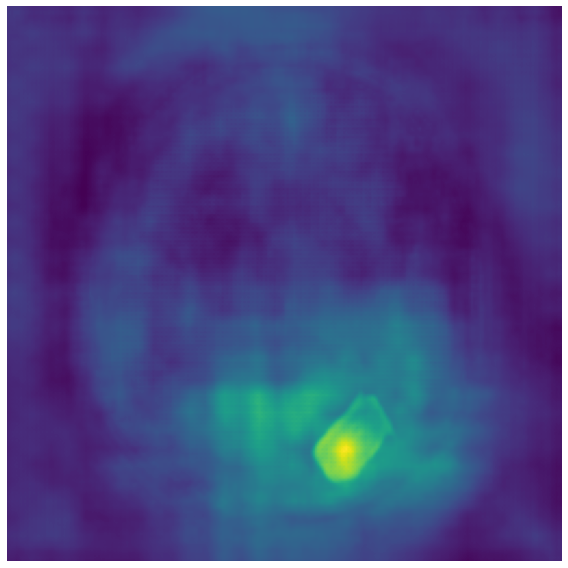

In [6]:
attr_model = KernelWeighted(model, layers)
attr_map = attr_model.forward(example_image)

gouda.print_grid(attr_map)